
# **Comparing Images**

1. Compare Images using Mean Squared Error (MSE)
2. Compare Images using Structual Similarity

In [4]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

#### **Mean Squared Error (MSE)**

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

- MSE is used to compare two images in image similarity assessment.
- It's commonly used in image compression, denoising, and image reconstruction tasks.
- If the images are identical, the MSE is 0. Higher values indicate greater differences.

In [2]:
def mse(image1, image2):
	# Images must be of the same dimension
	error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
	error /= float(image1.shape[0] * image1.shape[1])  # normalizes the error, ensuring that it does not depend on image size

	return error

#### **Let's get 3 images**

1. Fireworks1
2. Fireworks1 with brightness enhanced
3. Fireworks2

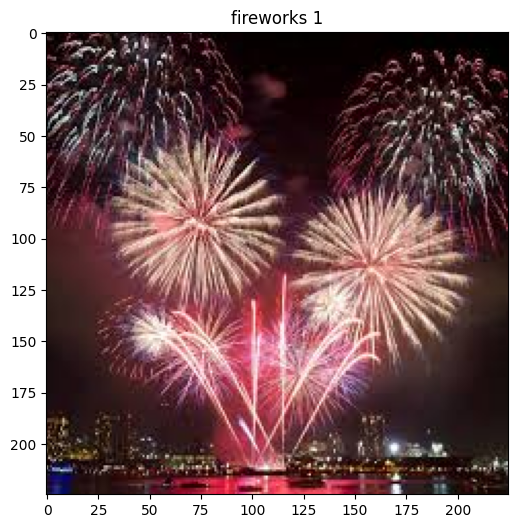

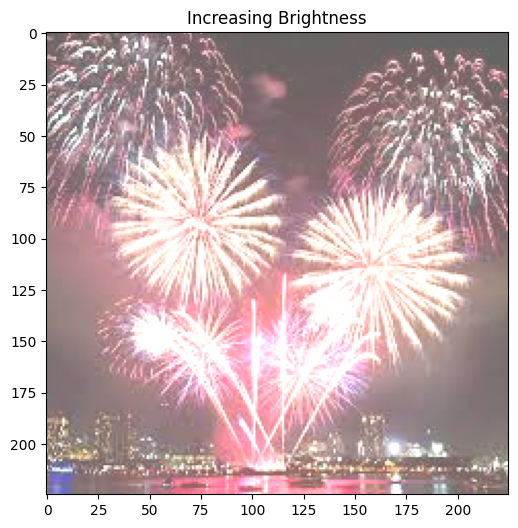

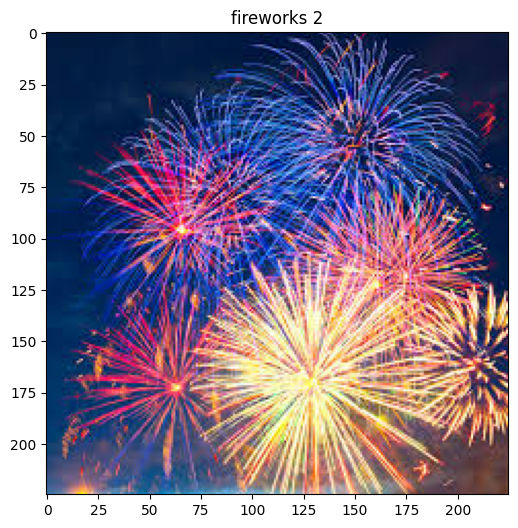

In [5]:
fireworks1 = cv2.imread('fireworks.jpeg')
fireworks2 = cv2.imread('fireworks2.jpeg')

M = np.ones(fireworks1.shape, dtype = "uint8") * 100
fireworks1b = cv2.add(fireworks1, M)

imshow("fireworks 1", fireworks1)
imshow("Increasing Brightness", fireworks1b)
imshow("fireworks 2", fireworks2)

In [6]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

In [7]:
# When they're the same
compare(fireworks1, fireworks1)

MSE = 0.00
SS = 1.00


In [9]:
compare(fireworks1, fireworks2)

MSE = 5387.94
SS = 0.06


In [11]:
compare(fireworks1, fireworks1b)
# note that mean square error is greater than when comparing with a different image, but according to structural similarity, it is more identical

MSE = 9029.17
SS = 0.58


In [12]:
compare(fireworks2, fireworks1b)

MSE = 9317.90
SS = 0.05


- If MSE = 0, it means the two images are pixel-wise identical.
- If SSIM = 1, it means the images are structurally identical in terms of contrast, luminance, and patterns.
- SSIM is generally a better metric for comparing images in real-world applications, such as image compression, enhancement, and denoising.

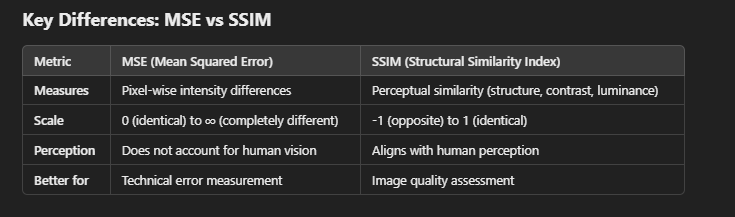